In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import plotly.express as px
import plotly.graph_objects as go

In [2]:
file_path = 'data\global-data-on-sustainable-energy.csv'

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
C:\Users\ShasenemBekjanNomela\AppData\Local\Temp\ipykernel_21848\2882227939.py:1: SyntaxWarning: invalid escape sequence '\g'
  file_path = 'data\global-data-on-sustainable-energy.csv'


In [3]:
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

C:\Users\ShasenemBekjanNomela\AppData\Local\Temp\ipykernel_21848\3657188477.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['GDP_Category'] = pd.cut(df_filtered['gdp_per_capita'], bins=gdp_bins, labels=gdp_labels, include_lowest=True)
C:\Users\ShasenemBekjanNomela\AppData\Local\Temp\ipykernel_21848\3657188477.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_filtered.groupby(['Year', 'GDP_Category'])['Value_co2_emissions_kt_by_country'].sum().unstack()


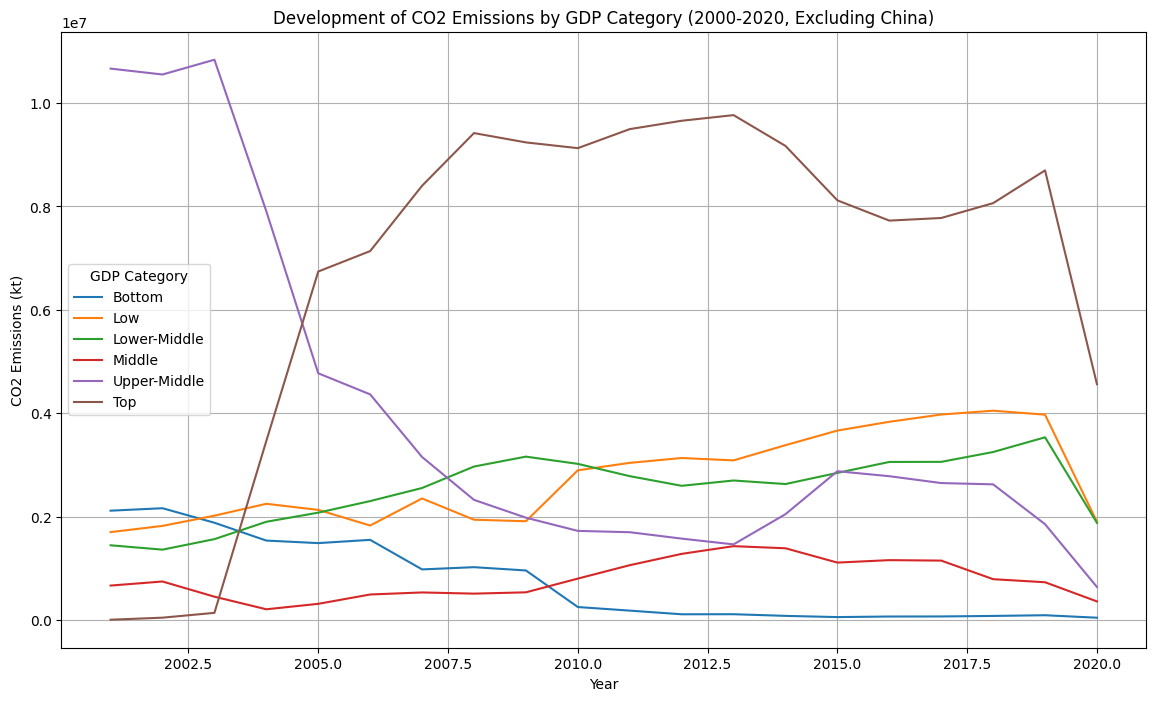

In [5]:
# Remove all data related to China
df_filtered = df[(df['Entity'] != 'China') & (df['Year'] >= 2000) & (df['Year'] <= 2020)]

# Define fixed GDP categories based on GDP per capita
gdp_bins = [0, 1000, 4000, 12000, 20000, 40000, df_filtered['gdp_per_capita'].max()]
gdp_labels = ['Bottom', 'Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'Top']

# Create GDP categories
df_filtered['GDP_Category'] = pd.cut(df_filtered['gdp_per_capita'], bins=gdp_bins, labels=gdp_labels, include_lowest=True)

# Group the data by year and GDP category, then sum CO2 emissions within each group
grouped_df = df_filtered.groupby(['Year', 'GDP_Category'])['Value_co2_emissions_kt_by_country'].sum().unstack()

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot CO2 emissions for each GDP category
for category in grouped_df.columns:
    plt.plot(grouped_df.index, grouped_df[category].rolling(2).mean(), label=category)  # rolling average to smooth data

# Adding titles and labels
plt.title('Development of CO2 Emissions by GDP Category (2000-2020, Excluding China)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.legend(title="GDP Category")
plt.grid(True)

# Show the plot
plt.show()

In [6]:
df = pd.read_csv(file_path)

# Group the data by country (Entity) and sum the CO2 emissions across all years
country_emissions = df.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum()

# Find the top 5 countries with the highest emissions
top_5_countries = country_emissions.nlargest(5)

# Display the results
print("Top 5 countries with the highest total CO2 emissions:")
print(top_5_countries.sort_values())

Top 5 countries with the highest total CO2 emissions:
Entity
Germany          1.547289e+07
Japan            2.367469e+07
India            3.267958e+07
United States    1.065908e+08
China            1.527328e+08
Name: Value_co2_emissions_kt_by_country, dtype: float64


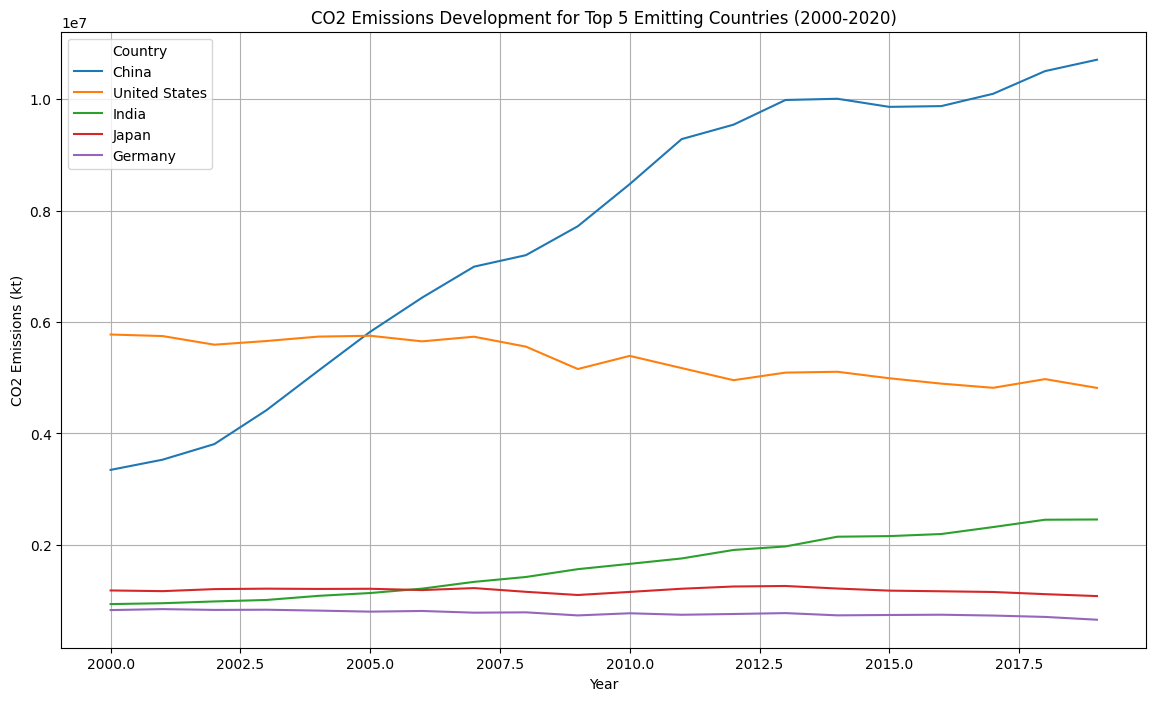

In [7]:
df = pd.read_csv(file_path)

# Filter the dataframe for the years between 2000 and 2020
df_filtered = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]

# Group the data by country (Entity) and sum the CO2 emissions across all years to find the top 5 emitters
country_emissions = df_filtered.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum()
top_5_countries = country_emissions.nlargest(5).index

# Filter the data to include only the top 5 countries
df_top_5 = df_filtered[df_filtered['Entity'].isin(top_5_countries)]

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot CO2 emissions for each of the top 5 countries
for country in top_5_countries:
    country_data = df_top_5[df_top_5['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Value_co2_emissions_kt_by_country'], label=country)

# Adding titles and labels
plt.title('CO2 Emissions Development for Top 5 Emitting Countries (2000-2020)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.legend(title="Country")
plt.grid(True)

# Show the plot
plt.show()

# COMBINE THE TWO, SCATTER AND LINE

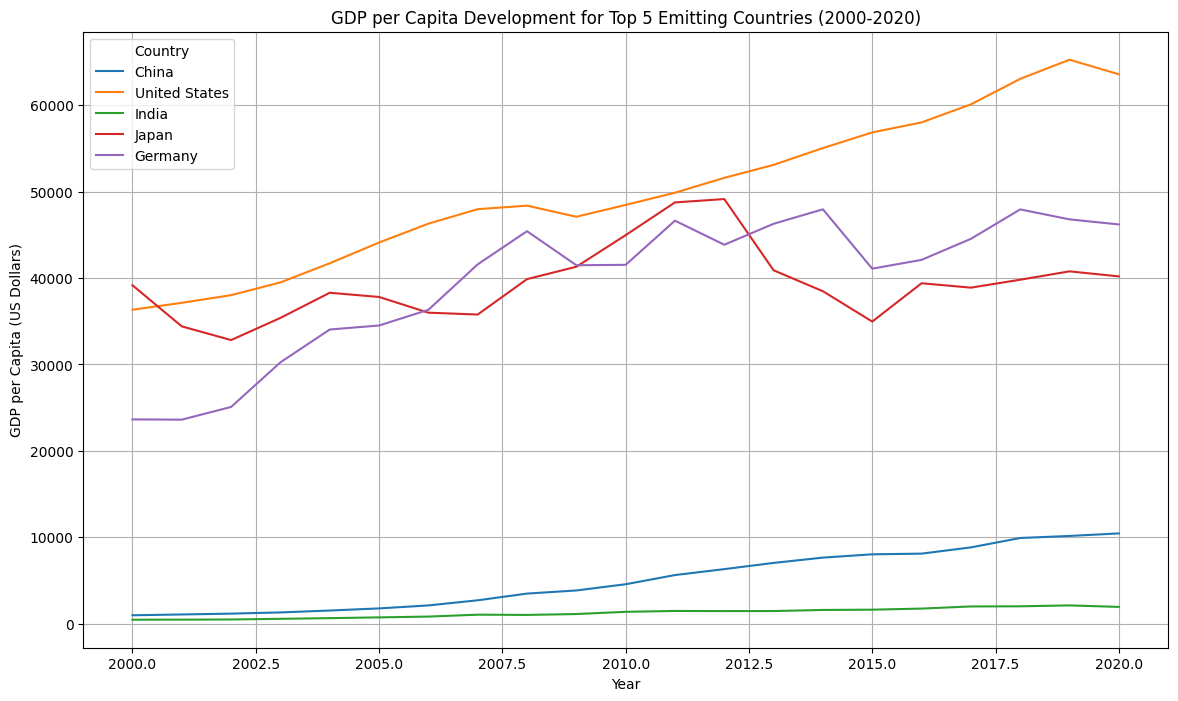

In [8]:
df = pd.read_csv(file_path)

# Filter the dataframe for the years between 2000 and 2020
df_filtered = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]

# Group the data by country (Entity) and sum the CO2 emissions across all years to find the top 5 emitters
country_emissions = df_filtered.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum()
top_5_countries = country_emissions.nlargest(5).index

# Filter the data to include only the top 5 countries
df_top_5 = df_filtered[df_filtered['Entity'].isin(top_5_countries)]

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot GDP per capita for each of the top 5 countries
for country in top_5_countries:
    country_data = df_top_5[df_top_5['Entity'] == country]
    plt.plot(country_data['Year'], country_data['gdp_per_capita'], label=country)

# Adding titles and labels
plt.title('GDP per Capita Development for Top 5 Emitting Countries (2000-2020)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (US Dollars)')
plt.legend(title="Country")
plt.grid(True)

# Show the plot
plt.show()

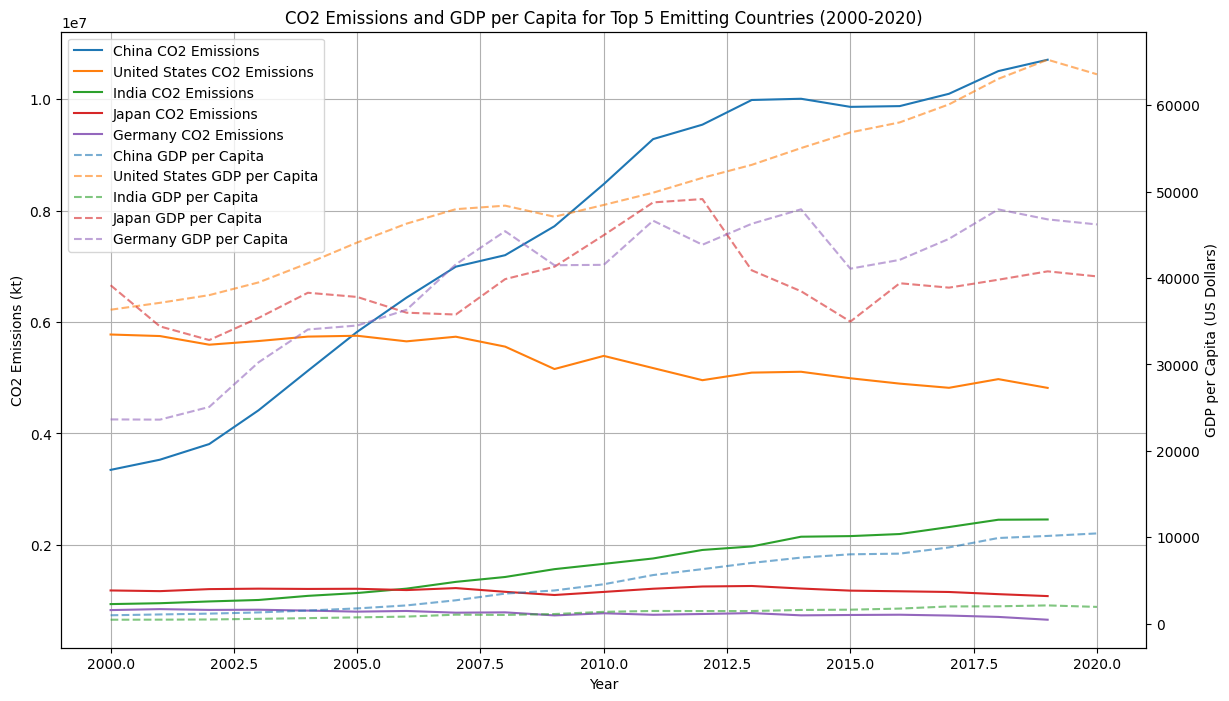

In [9]:
# COMBINATION PLOT

df = pd.read_csv(file_path)
 
# Filter the dataframe for the years between 2000 and 2020
df_filtered = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]
 
# Group the data by country (Entity) and sum the CO2 emissions across all years to find the top 5 emitters
country_emissions = df_filtered.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum()
top_5_countries = country_emissions.nlargest(5).index
 
# Filter the data to include only the top 5 countries
df_top_5 = df_filtered[df_filtered['Entity'].isin(top_5_countries)]
 
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(14, 8))
 
# Plot CO2 emissions on the primary y-axis (solid lines)
for country in top_5_countries:
    country_data = df_top_5[df_top_5['Entity'] == country]
    ax1.plot(country_data['Year'], country_data['Value_co2_emissions_kt_by_country'], label=f'{country} CO2 Emissions')
 
# Customize the primary y-axis (CO2 emissions)
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (kt)')
ax1.set_title('CO2 Emissions and GDP per Capita for Top 5 Emitting Countries (2000-2020)')
ax1.grid(True)
 
# Set up the second y-axis for GDP per capita (transparent dashed lines)
ax2 = ax1.twinx()
for country in top_5_countries:
    country_data = df_top_5[df_top_5['Entity'] == country]
    ax2.plot(country_data['Year'], country_data['gdp_per_capita'], linestyle='--', alpha=0.6, label=f'{country} GDP per Capita')
 
# Customize the second y-axis (GDP per capita)
ax2.set_ylabel('GDP per Capita (US Dollars)')
ax2.grid(False)
 
# Create a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
 
# Show the combined plot
plt.show()

# LINEAR REGRESSION

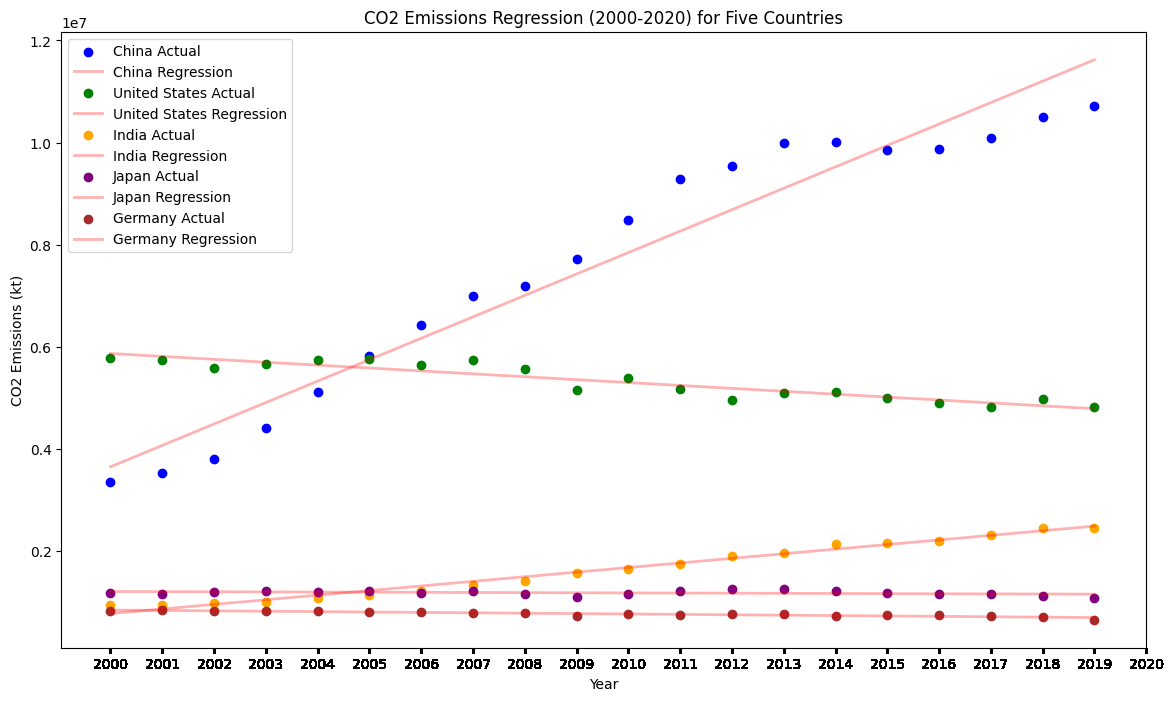

In [11]:
df = pd.read_csv(file_path)

# List of the five countries we are interested in
countries = ['China', 'United States', 'India', 'Japan', 'Germany']

# Filter the dataframe for the five countries and the years between 2000 and 2020
df_five_countries = df[(df['Entity'].isin(countries)) & (df['Year'] >= 2000) & (df['Year'] <= 2020)]

# Set up the plot
plt.figure(figsize=(14, 8))

# Define colors for each country
colors = {'China': 'blue', 'United States': 'green', 'India': 'orange', 'Japan': 'purple', 'Germany': 'brown'}

# Iterate through each country and plot their data with scatter points and regression line
for country in countries:
    country_data = df_five_countries[df_five_countries['Entity'] == country]
    X = country_data[['Year']]
    y = country_data['Value_co2_emissions_kt_by_country']

    # Scatter plot for actual data points
    plt.scatter(X, y, color=colors[country], label=f'{country} Actual')

    # Drop rows with NaN values to avoid errors in fitting the model
    df_clean = pd.concat([X, y], axis=1).dropna()
    X_clean = df_clean[['Year']]
    y_clean = df_clean['Value_co2_emissions_kt_by_country']

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_clean, y_clean)

    # Make predictions
    predictions = model.predict(X_clean)

    # Plot the regression line in red
    plt.plot(X_clean, predictions, color='red', linewidth=2, alpha=0.3, label=f'{country} Regression')

# Adding titles and labels
plt.title('CO2 Emissions Regression (2000-2020) for Five Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.grid(False) # TRUE?
plt.legend()
plt.xticks(df['Year']) # NO?
plt.show()

- Forecasted CO2 emissions for China in 2024: 13719848.54 kt
- Forecasted CO2 emissions for United States in 2024: 4504522.93 kt
- Forecasted CO2 emissions for India in 2024: 2940946.41 kt
- Forecasted CO2 emissions for Japan in 2024: 1144004.61 kt
- Forecasted CO2 emissions for Germany in 2024: 661475.25 kt

In [12]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

df = pd.read_csv(file_path)
# List of the five countries we are interested in
countries = ['China', 'United States', 'India', 'Japan', 'Germany']
future_years = np.array([[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030]])
colors = px.colors.qualitative.Plotly

# Filter the dataframe for the five countries and the years between 2000 and 2020
df_five_countries = df[(df['Entity'].isin(countries)) & (df['Year'] >= 2000) & (df['Year'] <= 2020)]

# Initialize a dictionary to store the forecasted values for 2023 and 2024
forecast_2023_2024 = {}

# Initialize a Plotly figure
fig = go.Figure()

# Define colors for each country
colors = {'China': 'blue', 'United States': 'green', 'India': 'orange', 'Japan': 'purple', 'Germany': 'brown'}

# Iterate through each country and apply linear regression
for country in countries:
    country_data = df_five_countries[df_five_countries['Entity'] == country]
    X = country_data[['Year']]  # Feature: Year
    y = country_data['Value_co2_emissions_kt_by_country']  # Target: CO2 emissions
    
    # Drop rows with NaN values to avoid errors in fitting the model
    df_clean = pd.concat([X, y], axis=1).dropna()
    X_clean = df_clean[['Year']]
    y_clean = df_clean['Value_co2_emissions_kt_by_country']

    # Train the linear regression model
    model = LinearRegression()
    mymodel = model.fit(X_clean.values, y_clean.values)

    # Make predictions for the existing data
    predictions = model.predict(X_clean.values)
    
    # Calculate and print the RMSE
    loss = rmse(y_clean, predictions)
    print(f"RMSE Loss for {country}: {loss:.2f}")

    # Scatter plot for actual data points
    fig.add_trace(go.Scatter(x=X_clean['Year'], y=y_clean, mode='lines', name=f'{country} Actual', line=dict(color=colors[country], width=2)))

    # Add the regression line for the current country
    fig.add_trace(go.Scatter(x=X_clean['Year'], y=predictions, mode='markers', name=f'{country} Prediction', marker=dict(color=colors[country])))

    # Predict future CO2 emissions for 2023 and 2030
    future_predictions = model.predict(future_years)

    # Plot the predictions for 2023 and 2030
    fig.add_trace(go.Scatter(x=future_years.flatten(), y=future_predictions, mode='markers', 
                                 marker=dict(size=6, symbol='x',color=colors[country]),
                                 name=f'{country} Future Predictions'))

    # Forecast emissions for the years 2023 and 2024
    year_2023_2024 = np.array([[2023], [2024]])  # Years to predict for
    forecast = model.predict(year_2023_2024)
    forecast_2023_2024[country] = forecast

# Update the layout of the plot
fig.update_layout(
    title='CO2 Emissions Regression (2000-2019) for Five Countries with Forecasts for 2020-2030',
    xaxis_title='Year',
    yaxis_title='CO2 Emissions (kt)',
    legend_title='Country',
    showlegend=True
)

# Show the plot
fig.show()

RMSE Loss for China: 579307.52
RMSE Loss for United States: 127321.40
RMSE Loss for India: 66598.39
RMSE Loss for Japan: 43254.76
RMSE Loss for Germany: 18249.58


In [13]:
# Actual values for CO2 emissions in 2023 from the internet
actual_values_2023 = {
    'China': 12600000,  # 12,600,000 kt
    'United States': 4800000,  # 4,800,000 kt
    'India': 2600000,  # 2,600,000 kt
    'Japan': 1000000,  # 1,000,000 kt
    'Germany': 598000  # 598,000 kt
}

# Forecasted values for CO2 emissions in 2023 from the regression model (from your image)
forecasted_values_2023 = {
    'China': 13300317.08,
    'United States': 4561420.56,
    'India': 2850810.73,
    'Japan': 1146744.60,
    'Germany': 669211.06
}

# Countries
countries = list(actual_values_2023.keys())

# Create the plot
fig = go.Figure()

# Add actual values as a bar
fig.add_trace(go.Bar(
    x=countries,
    y=[actual_values_2023[country] for country in countries],
    name='Actual 2023',
    marker_color='blue'
))

# Add forecasted values as a bar
fig.add_trace(go.Bar(
    x=countries,
    y=[forecasted_values_2023[country] for country in countries],
    name='Forecasted 2023',
    marker_color='red'
))

# Update the layout of the plot
fig.update_layout(
    title='Comparison of Actual vs Forecasted CO2 Emissions in 2023',
    xaxis_title='Country',
    yaxis_title='CO2 Emissions (kt)',
    barmode='group',  # Group the bars side by side
    legend_title='Type'
    
)

# Show the plot
fig.show()

In [14]:
df = pd.read_csv(file_path)

# List of the five countries we are interested in
countries = ['China', 'United States', 'India', 'Japan', 'Germany']

# Filter the dataframe for the five countries and select the relevant columns
df_five_countries = df[(df['Entity'].isin(countries)) & (df['Year'] >= 2000) & (df['Year'] <= 2020)]

# Initialize a Plotly figure
fig = go.Figure()

# Define colors for each country
colors = {'China': 'blue', 'United States': 'green', 'India': 'orange', 'Japan': 'purple', 'Germany': 'brown'}

# Iterate through each country and plot their renewable energy share
for country in countries:
    country_data = df_five_countries[df_five_countries['Entity'] == country]
    X = country_data['Year']
    y = country_data[r'Low-carbon electricity (% electricity)']  # Assumed column name for renewable energy share
    
    # Plot the development of renewable energy share for each country
    fig.add_trace(go.Scatter(x=X, y=y, mode='lines+markers', name=country, marker=dict(color=colors[country])))

# Update the layout of the plot
fig.update_layout(
    title='Renewables (Low-carbon electricity (% electricity)',
    xaxis_title='Year',
    yaxis_title='Renewable Energy Share (%)',
    legend_title='Country',
    showlegend=True
)

# Show the plot
fig.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import plotly.graph_objs as go

# Load the data
df = pd.read_csv('data/global-data-on-sustainable-energy.csv')

# List of the five countries we are interested in
countries = ['China', 'United States', 'India', 'Japan', 'Germany']

# Filter the dataframe for the five countries and select the relevant columns
df_five_countries = df[(df['Entity'].isin(countries)) & (df['Year'] >= 2000)]

# Initialize a Plotly figure
fig = go.Figure()

# Define colors for each country
colors = {'China': 'blue', 'United States': 'green', 'India': 'orange', 'Japan': 'purple', 'Germany': 'brown'}

# Degree of the polynomial (try different values for better fit)
degree = 2

# Iterate through each country and plot their low-carbon electricity share and predictions
for country in countries:
    country_data = df_five_countries[df_five_countries['Entity'] == country]
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data[r'Low-carbon electricity (% electricity)'].values  # Adjust column name as needed
    
    # Train the polynomial regression model
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(X, y)
    
    # Predict for the years starting from the last known year
    future_years = np.arange(X.min(), 2031).reshape(-1, 1)  # Start from the first year to the year 2030
    y_pred = polynomial_model.predict(future_years)
    
    # Combine actual and predicted values for the known range
    predicted_full_series = np.concatenate([y, y_pred[len(X):]])  # Take historical y and append predicted for future
    
    # Plot the historical data
    fig.add_trace(go.Scatter(x=country_data['Year'], y=y, mode='lines+markers', name=f'{country} (Actual)', marker=dict(color=colors[country])))
    
    # Plot the predicted data starting from the last known year
    fig.add_trace(go.Scatter(x=future_years.flatten(), y=predicted_full_series, mode='lines', name=f'{country} (Predicted)', line=dict(color=colors[country], dash='dash')))

# Update the layout of the plot
fig.update_layout(
    title='Low-carbon electricity prediction for 2030',
    xaxis_title='Year',
    yaxis_title='Low-carbon Electricity Share (%)',
    legend_title='Country',
    showlegend=True
)

# Show the plot
fig.show()


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

df = pd.read_csv('data/global-data-on-sustainable-energy.csv')


countries = ['China', 'United States', 'India', 'Japan', 'Germany']

df_five_countries = df[(df['Entity'].isin(countries)) & (df['Year'] >= 2000)]

degree = 2

for country in countries:
    country_data = df_five_countries[df_five_countries['Entity'] == country]
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data[r'Low-carbon electricity (% electricity)'].values  
  
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(X, y)
  
    future_years = np.arange(X.min(), 2031).reshape(-1, 1)
    y_pred_full = polynomial_model.predict(future_years)
    
    y_pred_train = polynomial_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred_train))
    r2 = r2_score(y, y_pred_train)
    
    print(f"Country: {country}")
    print(f"  RMSE (up to latest known year): {rmse}")
    print(f"  R-squared (up to latest known year): {r2}")
    print("-" * 30)

Country: China
  RMSE (up to latest known year): 1.0744520805345152
  R-squared (up to latest known year): 0.9547064518942514
------------------------------
Country: United States
  RMSE (up to latest known year): 0.6096418967122187
  R-squared (up to latest known year): 0.9706815704486027
------------------------------
Country: India
  RMSE (up to latest known year): 1.3946631476953344
  R-squared (up to latest known year): 0.4569147029681022
------------------------------
Country: Japan
  RMSE (up to latest known year): 6.047133772702931
  R-squared (up to latest known year): 0.6405744385999356
------------------------------
Country: Germany
  RMSE (up to latest known year): 1.4442951046637669
  R-squared (up to latest known year): 0.9289781006293056
------------------------------


In [15]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Define the RMSE function
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

# Load the dataset
df = pd.read_csv(file_path)

# List of countries (excluding Japan for the first model)
countries = ['China', 'United States', 'India', 'Japan', 'Germany']

# Filter the dataframe for the four countries (2000-2020)
df_five_countries = df[(df['Entity'].isin(countries)) & (df['Year'] >= 2000) & (df['Year'] <= 2020)]

# Initialize a dictionary to store the forecasted values for 2023 and 2024
forecast_2023_2024 = {}

# Initialize a Plotly figure
fig = go.Figure()

# Define colors for each country (including Japan)
colors = {'China': 'blue', 'United States': 'green', 'India': 'orange', 'Germany': 'brown', 'Japan': 'purple'}

# Iterate through each country (except Japan) and apply linear regression
for country in countries:
    country_data = df_five_countries[df_five_countries['Entity'] == country]
    X = country_data[['Year']]  # Feature: Year
    y = country_data['Low-carbon electricity (% electricity)']  # Adjust to correct column name

    # Find indices where both X and y are valid (non-NaN)
    valid_indices = X['Year'].notna() & y.notna()

    # Train the model only on valid data points (non-NaN)
    X_valid = X[valid_indices]
    y_valid = y[valid_indices]

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_valid, y_valid)

    # Make predictions for the valid data points
    predictions = model.predict(X_valid)

    # Calculate and print the RMSE
    loss = rmse(y_valid, predictions)
    print(f"RMSE Loss for {country}: {loss:.2f}")

    # Scatter plot for actual data points, including NaNs
    fig.add_trace(go.Scatter(x=X['Year'], y=y, mode='markers', name=f'{country} Actual', marker=dict(color=colors[country])))

    # Plot the regression line for valid data, matching the scatter color
    fig.add_trace(go.Scatter(x=X_valid['Year'], y=predictions, mode='lines', name=f'{country} Prediction', line=dict(color=colors[country], width=2)))

    # Forecast emissions for the years 2023 and 2024
    year_2023_2024 = np.array([[2023], [2024]])  # Years to predict for
    forecast = model.predict(year_2023_2024)
    forecast_2023_2024[country] = forecast

# Now handle Japan separately with data between 2013 and 2020
japan_data = df[(df['Entity'] == 'Japan') & (df['Year'] >= 2013) & (df['Year'] <= 2020)]
X_japan = japan_data[['Year']]  # Feature: Year for Japan (2013-2020)
y_japan = japan_data['Low-carbon electricity (% electricity)']  # Adjust to correct column name

# Find indices where both X_japan and y_japan are valid (non-NaN)
valid_indices_japan = X_japan['Year'].notna() & y_japan.notna()

# Train the model only on valid data points for Japan
X_japan_valid = X_japan[valid_indices_japan]
y_japan_valid = y_japan[valid_indices_japan]

# Train a separate linear regression model for Japan
model_japan = LinearRegression()
model_japan.fit(X_japan_valid, y_japan_valid)

# Make predictions for the valid Japan data points
predictions_japan = model_japan.predict(X_japan_valid)

# Calculate and print the RMSE for Japan
loss_japan = rmse(y_japan_valid, predictions_japan)
print(f"RMSE Loss for Japan: {loss_japan:.2f}")

# Scatter plot for actual Japan data points
fig.add_trace(go.Scatter(x=X_japan['Year'], y=y_japan, mode='markers', name='Japan Actual', marker=dict(color=colors['Japan'])))

# Plot the regression line for Japan, matching the scatter color
fig.add_trace(go.Scatter(x=X_japan_valid['Year'], y=predictions_japan, mode='lines', name='Japan Prediction', line=dict(color=colors['Japan'], width=2)))

# Forecast emissions for Japan for 2023 and 2024
year_2023_2024_japan = np.array([[2023], [2024]])  # Years to predict for
forecast_japan = model_japan.predict(year_2023_2024_japan)
forecast_2023_2024['Japan'] = forecast_japan

# Update the layout of the plot
fig.update_layout(
    title='Low-carbon Electricity Regression (2000-2020) for Selected Countries and Japan (2013-2020) with Forecasts for 2023 and 2024',
    xaxis_title='Year',
    yaxis_title='Low-carbon Electricity (% of Total)',
    legend_title='Country',
    showlegend=True
)

# Show the plot
fig.show()

# Print the forecasted low-carbon electricity values for 2023 and 2024
for country, forecast in forecast_2023_2024.items():
    print(f'{country}: Low-carbon electricity forecast for 2023: {forecast[0]:.2f}%, for 2024: {forecast[1]:.2f}%')

df_five_countries.shape


RMSE Loss for China: 2.27
RMSE Loss for United States: 1.46
RMSE Loss for India: 1.40
RMSE Loss for Japan: 6.42
RMSE Loss for Germany: 2.62
RMSE Loss for Japan: 0.82


c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature

China: Low-carbon electricity forecast for 2023: 32.27%, for 2024: 33.01%
United States: Low-carbon electricity forecast for 2023: 38.69%, for 2024: 39.22%
India: Low-carbon electricity forecast for 2023: 21.14%, for 2024: 21.35%
Japan: Low-carbon electricity forecast for 2023: 32.88%, for 2024: 34.98%
Germany: Low-carbon electricity forecast for 2023: 50.85%, for 2024: 51.64%


(105, 21)

In [16]:

# Forecasted values from your model (as in the image)
forecasted_values_2023 = {
    'China': 32.27, 
    'United States': 38.69, 
    'India': 21.14, 
    'Japan': 32.88, 
    'Germany': 50.85
}

# Actual values for 2023 (provided by you)
actual_values_2023 = {
    'China': 35.2, 
    'United States': 40.7, 
    'India': 22.0, 
    'Japan': 29.7, 
    'Germany': 53.2
}

# List of countries
countries = list(forecasted_values_2023.keys())

# Create the bar chart
fig = go.Figure()

# Add forecasted values to the chart
fig.add_trace(go.Bar(
    x=countries,
    y=[forecasted_values_2023[country] for country in countries],
    name='Forecasted 2023',
    marker_color='red'
))

# Add actual values to the chart
fig.add_trace(go.Bar(
    x=countries,
    y=[actual_values_2023[country] for country in countries],
    name='Actual 2023',
    marker_color='blue'
))

# Update the layout of the plot
fig.update_layout(
    title='Comparison of Actual vs Forecasted Low-Carbon Electricity Share in 2023',
    xaxis_title='Country',
    yaxis_title='Low-carbon Electricity Share (%)',
    barmode='group',  # Group the bars side by side
    legend_title='Type'
)

# Show the plot
fig.show()


In [17]:
df = pd.read_csv(file_path)

# List of the five countries we are interested in
countries = ['China', 'United States', 'India', 'Japan', 'Germany']

# Filter the dataframe for the five countries and select the relevant columns
df_five_countries = df[(df['Entity'].isin(countries)) & (df['Year'] >= 2000) & (df['Year'] <= 2020)]

# Initialize a Plotly figure
fig = go.Figure()

# Define colors for each country
colors = {'China': 'blue', 'United States': 'green', 'India': 'orange', 'Japan': 'purple', 'Germany': 'brown'}

# Iterate through each country and plot their renewable energy share
for country in countries:
    country_data = df_five_countries[df_five_countries['Entity'] == country]
    X = country_data['Year']
    y = country_data[r'gdp_growth']  # Assumed column name for renewable energy share
    
    # Plot the development of renewable energy share for each country
    fig.add_trace(go.Scatter(x=X, y=y, mode='lines+markers', name=country, marker=dict(color=colors[country])))

# Update the layout of the plot
fig.update_layout(
    title='gdp_growth',
    xaxis_title='Year',
    yaxis_title='gdp_growth',
    legend_title='Country',
    showlegend=True
)

# Show the plot
fig.show()


# SUB SAHARA

In [18]:
subsaharan_df=pd.read_csv('data/subsaharan-africa.csv')
 
lowest_countries=['Chad', 'Niger', 'Burkina Faso', 'South Sudan', 'Central African Republic', 'Congo', 'Burundi', 'Malaw',  'Sierra Leone']
 
lowest_df=subsaharan_df[subsaharan_df['Entity'].isin(lowest_countries)]

In [19]:
subsaharan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            953 non-null    object 
 1   Year                                                              953 non-null    int64  
 2   Access to electricity (% of population)                           944 non-null    float64
 3   Access to clean fuels for cooking                                 953 non-null    float64
 4   Renewable-electricity-generating-capacity-per-capita              953 non-null    float64
 5   Financial flows to developing countries (US $)                    579 non-null    float64
 6   Renewable energy share in the total final energy consumption (%)  908 non-null    float64
 7   Electricity from fossil fuels (TWh)

In [20]:
# Create a plotly figure
fig = go.Figure()

# Years to predict (2023 and 2030)
future_years = np.array([[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030]])

# Generate a unique color for each country
colors = px.colors.qualitative.Plotly

# Iterate through each Sub-Saharan country and plot their data with scatter points, regression line, and future predictions
for i, country in enumerate(lowest_countries):
    country_data = subsaharan_df[subsaharan_df['Entity'] == country]
    X = country_data[['Year']]
    y = country_data['Value_co2_emissions_kt_by_country']

    # Drop rows with NaN values to avoid errors
    df_clean = pd.concat([X, y], axis=1).dropna()
    X_clean = df_clean[['Year']]
    y_clean = df_clean['Value_co2_emissions_kt_by_country']

    # Proceed only if there are valid data points
    if len(X_clean) > 0:
        # Scatter plot for actual data points
        fig.add_trace(go.Scatter(x=X_clean['Year'], y=y_clean, mode='markers', name=f'{country} Actual', marker=dict(color=colors[i % len(colors)])))

        # Train the linear regression model
        model = LinearRegression()
        model.fit(X_clean, y_clean)

        # Make predictions for the actual data
        predictions = model.predict(X_clean)

        # Plot the regression line
        fig.add_trace(go.Scatter(x=X_clean['Year'], y=predictions, mode='lines', name=f'{country} Regression', line=dict(color=colors[i % len(colors)])))

        # Predict future CO2 emissions for 2023 and 2030
        future_predictions = model.predict(future_years)

        # Plot the predictions for 2023 and 2030
        fig.add_trace(go.Scatter(x=future_years.flatten(), y=future_predictions, mode='markers', 
                                 marker=dict(size=6,  color=colors[i % len(colors)]), # symbol='x',
                                 name=f'{country} Future Predictions'))

# Adding titles and labels
fig.update_layout(
    title='CO2 Emissions Regression and Predictions for 2023 and 2030 (Sub-Saharan African Countries)',
    xaxis_title='Year',
    yaxis_title='CO2 Emissions (kt)',
    showlegend=True
)

# Show the plot
fig.show()

# print R2 score and rmse for the predictions
r2_scores = []
rmses = []

# Iterate through each Sub-Saharan country and calculate R2 score and RMSE for the predictions
for i, country in enumerate(lowest_countries):
    country_data = subsaharan_df[subsaharan_df['Entity'] == country]
    X = country_data[['Year']]
    y = country_data['Value_co2_emissions_kt_by_country']

    # Drop rows with NaN values to avoid errors
    df_clean = pd.concat([X, y], axis=1).dropna()
    X_clean = df_clean[['Year']]
    y_clean = df_clean['Value_co2_emissions_kt_by_country']

    # Proceed only if there are valid data points
    if len(X_clean) > 0:
        # Train the linear regression model
        model = LinearRegression()
        model.fit(X_clean, y_clean)

        # Make predictions for the actual data
        predictions = model.predict(X_clean)

        # Calculate R2 score and RMSE
        r2 = r2_score(y_clean, predictions)
        rmse_val = rmse(y_clean, predictions)

        r2_scores.append(r2)
        rmses.append(rmse_val)

# Print the average R2 score and RMSE for the predictions
print(f"Average R2 Score: {np.mean(r2_scores):.2f}")
print(f"Average RMSE: {np.mean(rmses):.2f}")

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature

Average R2 Score: 0.62
Average RMSE: 177.34


In [21]:
subsaharan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            953 non-null    object 
 1   Year                                                              953 non-null    int64  
 2   Access to electricity (% of population)                           944 non-null    float64
 3   Access to clean fuels for cooking                                 953 non-null    float64
 4   Renewable-electricity-generating-capacity-per-capita              953 non-null    float64
 5   Financial flows to developing countries (US $)                    579 non-null    float64
 6   Renewable energy share in the total final energy consumption (%)  908 non-null    float64
 7   Electricity from fossil fuels (TWh)

In [22]:
# Create a plotly figure
fig = go.Figure()

# Years to predict (2023 and 2030)
future_years = np.array([[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030]])

# Generate a unique color for each country
colors = px.colors.qualitative.Plotly

# Iterate through each Sub-Saharan country and plot their data with scatter points, regression line, and future predictions
for i, country in enumerate(lowest_countries):
    country_data = subsaharan_df[subsaharan_df['Entity'] == country]
    X = country_data[['Year']]
    # scaler = StandardScaler()
    # X = scaler.fit_transform(X)
    y = country_data['Low-carbon electricity (% electricity)']

    # Drop rows with NaN values to avoid errors
    df_clean = pd.concat([X, y], axis=1).dropna()
    X_clean = df_clean[['Year']]
    y_clean = df_clean['Low-carbon electricity (% electricity)']

    # Proceed only if there are valid data points
    if len(X_clean) > 0:
        # Scatter plot for actual data points
        fig.add_trace(go.Scatter(x=X_clean['Year'], y=y_clean, mode='markers', name=f'{country} Actual', marker=dict(color=colors[i % len(colors)])))

        # Train the linear regression model
        model = LinearRegression()
        model.fit(X_clean, y_clean)

        # Make predictions for the actual data
        predictions = model.predict(X_clean)

        # Plot the regression line
        fig.add_trace(go.Scatter(x=X_clean['Year'], y=predictions, mode='lines', name=f'{country} Regression', line=dict(color=colors[i % len(colors)])))

        # Predict future CO2 emissions for 2023 and 2030
        future_predictions = model.predict(future_years)

        # Plot the predictions for 2023 and 2030
        fig.add_trace(go.Scatter(x=future_years.flatten(), y=future_predictions, mode='markers', 
                                 marker=dict(size=6,  color=colors[i % len(colors)]), # symbol='x',
                                 name=f'{country} Future Predictions'))

# Adding titles and labels
fig.update_layout(
    title='Low-carbon Electricity Regression and Predictions for 2023 and 2030 (Sub-Saharan African Countries with lowest access to energy)',
    xaxis_title='Year',
    yaxis_title='Low-carbon Electricity (% electricity)',
    showlegend=True
)

# Show the plot
fig.show()

# print R2 score and rmse for the predictions
r2_scores = []
rmses = []

# Iterate through each Sub-Saharan country and calculate R2 score and RMSE for the predictions
for i, country in enumerate(lowest_countries):
    country_data = subsaharan_df[subsaharan_df['Entity'] == country]
    X = country_data[['Year']]
    y = country_data['Low-carbon electricity (% electricity)']

    # Drop rows with NaN values to avoid errors
    df_clean = pd.concat([X, y], axis=1).dropna()
    X_clean = df_clean[['Year']]
    y_clean = df_clean['Low-carbon electricity (% electricity)']

    # Proceed only if there are valid data points
    if len(X_clean) > 0:
        # Train the linear regression model
        model = LinearRegression()
        model.fit(X_clean, y_clean)

        # Make predictions for the actual data
        predictions = model.predict(X_clean)

        # Calculate R2 score and RMSE
        r2 = r2_score(y_clean, predictions)
        rmse_val = rmse(y_clean, predictions)

        r2_scores.append(r2)
        rmses.append(rmse_val)

# Print the average R2 score and RMSE for the predictions
print(f"Average R2 Score: {np.mean(r2_scores):.2f}")
print(f"Average RMSE: {np.mean(rmses):.2f}")

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\ShasenemBekjanNomela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature

Average R2 Score: 0.71
Average RMSE: 4.54


In [23]:
# 1. Identify the top 5 countries based on the total financial aid received over the last 20 years
df_total_aid = subsaharan_df.groupby('Entity')['Financial flows to developing countries (US $)'].sum().nlargest(5)
top_5_countries = df_total_aid.index

# Filter the dataframe to only include the top 5 countries
df_top_5 = subsaharan_df[subsaharan_df['Entity'].isin(top_5_countries)]

# 2. Plot development of Low-carbon electricity for the top 5 countries
fig_low_carbon = px.line(
    df_top_5, 
    x='Year', 
    y='Low-carbon electricity (% electricity)', 
    color='Entity',
    title='Development of Low-carbon Electricity for Top 5 Financial Aid Recipients (Sub-Saharan Africa)',
    labels={
        'Low-carbon electricity (% electricity)': 'Low-carbon Electricity (% electricity)',
        'Year': 'Year',
        'Entity': 'Country'
    }
)

# Show the plot for Low-carbon electricity development
fig_low_carbon.show()

# 3. Plot development of CO2 emissions for the top 5 countries
fig_co2_emissions = px.line(
    df_top_5, 
    x='Year', 
    y='Value_co2_emissions_kt_by_country', 
    color='Entity',
    title='Development of CO2 Emissions for Top 5 Financial Aid Recipients (Sub-Saharan Africa)',
    labels={
        'Value_co2_emissions_kt_by_country': 'CO2 Emissions (kt)',
        'Year': 'Year',
        'Entity': 'Country'
    }
)

# Show the plot for CO2 emissions development
fig_co2_emissions.show()


In [24]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

# LOOK AT SCALING FOR Y-AXIS

In [25]:
# Create a plotly figure
fig = go.Figure()

# Define the color scheme for each variable (using standard colors)
nuclear_renewable_colors = {'Ethiopia': 'blue', 'Kenya': 'red', 'Nigeria': 'green', 'Uganda': 'purple', 'Zambia': 'orange'}
co2_colors = {'Ethiopia': 'lightblue', 'Kenya': 'lightcoral', 'Nigeria': 'lightgreen', 'Uganda': 'mediumpurple', 'Zambia': 'lightsalmon'}

# Create a new column for the sum of 'Electricity from nuclear (TWh)' and 'Electricity from renewables (TWh)'
df_top_5['Total_Nuclear_Renewable_Electricity (TWh)'] = df_top_5['Electricity from nuclear (TWh)'] + df_top_5['Electricity from renewables (TWh)']

# Plot summed nuclear and renewable electricity for each top 5 country
for country in top_5_countries:
    country_data = df_top_5[df_top_5['Entity'] == country]

    fig.add_trace(go.Scatter(
        x=country_data['Year'], 
        y=country_data['Total_Nuclear_Renewable_Electricity (TWh)'], 
        mode='lines',
        name=f'{country} Nuclear + Renewable Electricity',
        line=dict(color=nuclear_renewable_colors[country])
    ))

# Plot CO2 emissions for each top 5 country (on secondary axis)
for country in top_5_countries:
    country_data = df_top_5[df_top_5['Entity'] == country]

    fig.add_trace(go.Scatter(
        x=country_data['Year'], 
        y=country_data['Value_co2_emissions_kt_by_country'], 
        mode='lines',
        name=f'{country} CO2 Emissions',
        line=dict(dash='dot', color=co2_colors[country]),  # Dashed line for CO2 emissions
      #  yaxis='y2'
    ))

# Update layout for two y-axes
fig.update_layout(
    title='Development of Nuclear + Renewable Electricity and CO2 Emissions for Top 5 Financial Aid Recipients',
    xaxis_title='Year',
    yaxis_title='Nuclear + Renewable Electricity (TWh)',
    yaxis2=dict(
        title='CO2 Emissions (kt)',
        overlaying='y',  # Overlay on the same x-axis
        side='right'  # Secondary y-axis on the right
    ),
    legend_title='Variables',
    template='plotly_white'
)

# Show the combined plot
fig.show()


C:\Users\ShasenemBekjanNomela\AppData\Local\Temp\ipykernel_21848\3786241285.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:

# Create a plotly figure
fig = go.Figure()

# Define the color scheme for each variable (using standard colors)
nuclear_renewable_colors = {'Ethiopia': 'blue', 'Kenya': 'red', 'Nigeria': 'green', 'Uganda': 'purple', 'Zambia': 'orange'}
co2_colors = {'Ethiopia': 'lightblue', 'Kenya': 'lightcoral', 'Nigeria': 'lightgreen', 'Uganda': 'mediumpurple', 'Zambia': 'lightsalmon'}

# Create a new column for the sum of 'Electricity from nuclear (TWh)' and 'Electricity from renewables (TWh)'
df_top_5['Total_Nuclear_Renewable_Electricity (TWh)'] = df_top_5['Electricity from nuclear (TWh)'] + df_top_5['Electricity from renewables (TWh)']

# Plot summed nuclear and renewable electricity for each top 5 country
for country in top_5_countries:
    country_data = df_top_5[df_top_5['Entity'] == country]

    fig.add_trace(go.Scatter(
        x=country_data['Year'], 
        y=country_data['Total_Nuclear_Renewable_Electricity (TWh)'], 
        mode='lines',
        name=f'{country} Nuclear + Renewable Electricity',
        line=dict(color=nuclear_renewable_colors[country])
    ))

# Plot Electricity from fossil fuels (TWh) for each top 5 country (on secondary axis)
for country in top_5_countries:
    country_data = df_top_5[df_top_5['Entity'] == country]

    fig.add_trace(go.Scatter(
        x=country_data['Year'], 
        y=country_data['Electricity from fossil fuels (TWh)'], 
        mode='lines',
        name=f'{country} Electricity from fossil fuels (TWh)',
        line=dict(dash='dot', color=co2_colors[country]),  # Dashed line for fossil fuels
       # yaxis='y2'
    ))

# Update layout for two y-axes
fig.update_layout(
    title='Development of Nuclear + Renewable Electricity and Electricity from fossil fuels (TWh) for Top 5 Financial Aid Recipients',
    xaxis_title='Year',
    yaxis_title='Values (TWh)',
    yaxis2=dict(
        title='Electricity from fossil fuels (TWh)',
        overlaying='y',  # Overlay on the same x-axis
        side='right'  # Secondary y-axis on the right
    ),
    legend_title='Variables',
    template='plotly_white'
)

# Show the combined plot
fig.show()


C:\Users\ShasenemBekjanNomela\AppData\Local\Temp\ipykernel_21848\1833610201.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

